In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import math
import itertools
from sklearn.metrics import confusion_matrix

In [334]:
import seaborn as sns

In [2]:
funk_features = pd.read_pickle(open("datasets/funk_features", "rb"))
punk_features = pd.read_pickle(open("datasets/punk_features", "rb"))
rock_features = pd.read_pickle(open("datasets/rock_features", "rb"))
jazz_features = pd.read_pickle(open("datasets/jazz_features", "rb"))

vaporwave_features = pd.read_pickle(open("datasets/vaporwave_features", "rb"))
classical_features = pd.read_pickle(open("datasets/classical_features", "rb"))
hiphop_features    = pd.read_pickle(open("datasets/hiphop_features",    "rb"))
house_features     = pd.read_pickle(open("datasets/house_features",     "rb"))

meditation_features = pd.read_pickle("datasets/meditation_features")
hardcore_features   = pd.read_pickle("datasets/hardcore_features")
kpop_features       = pd.read_pickle("datasets/k-pop_features")
metal_features      = pd.read_pickle("datasets/metal_features")

rap_features    = pd.read_pickle("datasets/rap_features")
soul_features   = pd.read_pickle("datasets/soul_features")
techno_features = pd.read_pickle("datasets/techno_features")
grunge_features = pd.read_pickle("datasets/grunge_features")

featureslist = [funk_features, punk_features, rock_features, jazz_features, vaporwave_features, classical_features, hiphop_features, house_features, meditation_features, hardcore_features, kpop_features, metal_features, rap_features, soul_features, techno_features, grunge_features]
genre_names = ['funk', 'punk', 'rock', 'jazz', 'vaporwave', 'classical', 'hiphop', 'house', 'meditation', 'hardcore', 'kpop', 'metal', 'rap', 'soul', 'techno', 'grunge']

In [3]:
# test if column indices are the same for all 
indices = list(funk_features.columns)
for f in featureslist:
    if not list(f.columns) == indices:
        print("TEST FAILED")
        break
else:
    print("TEST SUCCEEDED")

TEST SUCCEEDED


In [4]:
funk = funk_features.as_matrix()
punk = punk_features.as_matrix()
rock = rock_features.as_matrix()
jazz = jazz_features.as_matrix()

vaporwave = vaporwave_features.as_matrix()
classical = classical_features.as_matrix()
hiphop    = hiphop_features.as_matrix()
house     = house_features.as_matrix()

meditation = meditation_features.as_matrix()
hardcore   = hardcore_features.as_matrix()
metal      = metal_features.as_matrix()
kpop       = kpop_features.as_matrix()

rap    = rap_features.as_matrix()
soul   = soul_features.as_matrix()
techno = techno_features.as_matrix()
grunge = grunge_features.as_matrix()

all_genres = [funk, punk, rock, jazz, vaporwave, classical, hiphop, house, meditation, hardcore, metal, kpop, rap, soul, techno, grunge]

In [5]:
indices

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

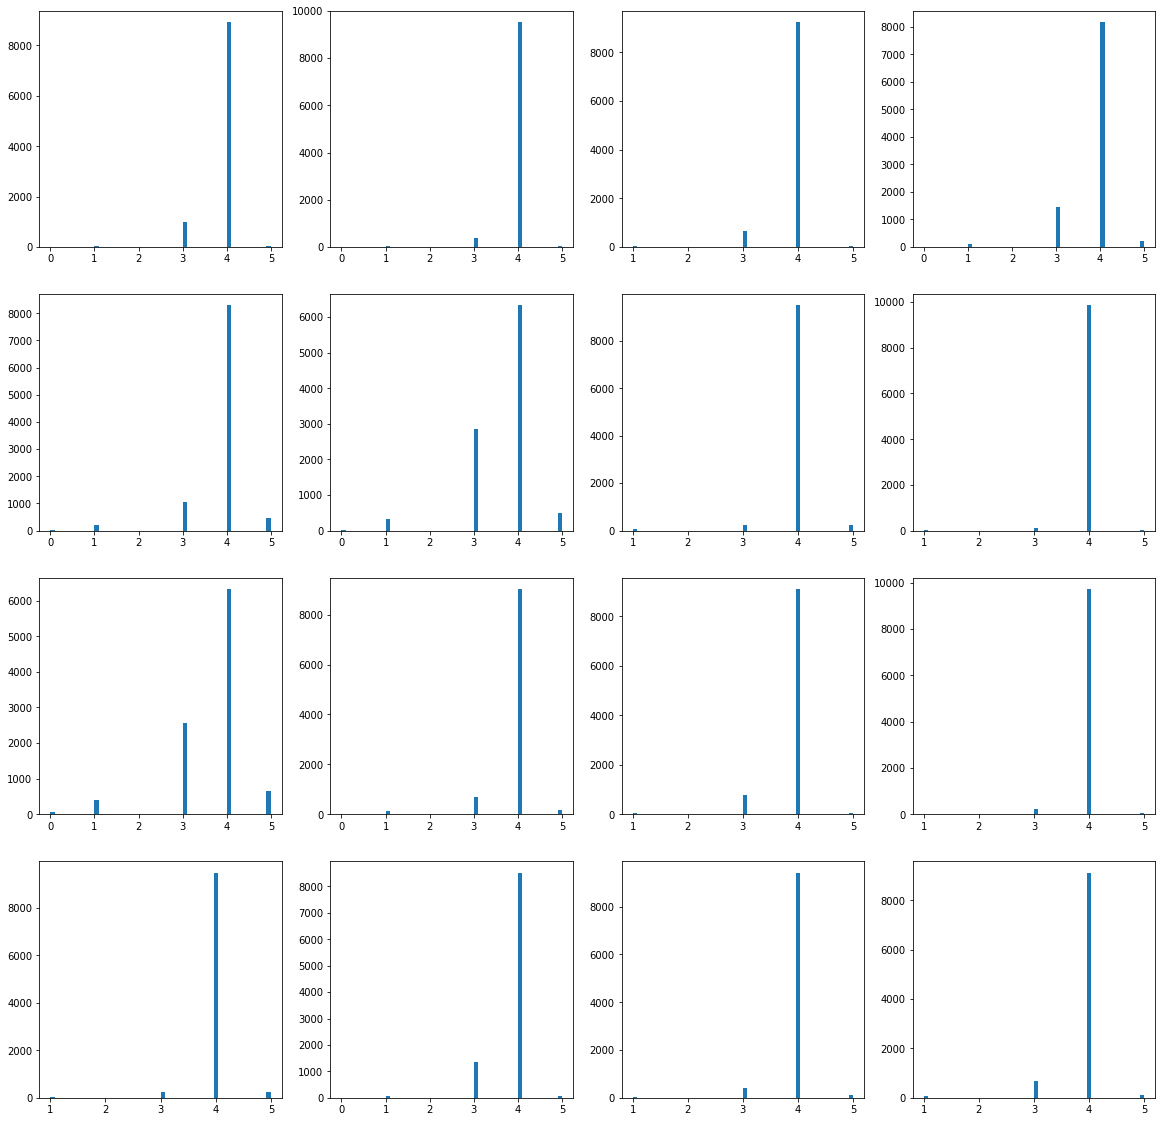

In [6]:
feature = 'time_signature'
k = 50

plt.figure(figsize=(20, 20))

for i in range(len(all_genres)):
    plt.subplot(4, 4, i + 1)
    plt.hist(all_genres[i][:,indices.index(feature)], k)

plt.show()

In [61]:
def percentile(values, alpha):
    values = sorted(values)
    bound = (len(values) - 1) * alpha
    low = math.floor(bound)
    rc = values[low+1] - values[low]
    return values[low] + rc * (bound - np.floor(bound))

def CI_95(data):
    return percentile(data, 0.025), percentile(data, 0.975)

In [467]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


#     plt.imshow(cm, interpolation='nearest', cmap=KLEUR, alpha = 0.4, shape=(10,7))
#     plt.title(title)
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('Mean genre')
#     plt.xlabel('CI genre')
    
    sns.heatmap(cm, annot=cm, xticklabels=classes, yticklabels=classes)
#     plt.xticks(cm, classes, rotation='vertical')
#     plt.yticks(cm, classes)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(list(reversed(tick_marks)), classes, rotation='horizontal')

In [468]:
def plot_feature_importance(feature):
    CIs = {}
    means = {}
    for i in range(len(all_genres)):
        feature_of_genre = all_genres[i][:, indices.index(feature)]
        CIs[genre_names[i]] = (CI_95(all_genres[i][:, indices.index(feature)]))
        means[genre_names[i]] = np.mean(all_genres[i][:, indices.index(feature)])
        
#     CI_mean_test = {name : [] for name in genre_names}
    CI_mean_test = [[] for _ in genre_names]

#     for name1 in genre_names:
#         # take mean of one genre
#         mean = means[name1]

#         # for every other genre, compute the CI and see if the mean lies in it
#         for name2 in genre_names:
#             CImin, CImax = CIs[name2]
#             CI_mean_test[name1] += [mean < CImin or mean > CImax]

    for i in range(len(genre_names)):
        mean = means[genre_names[i]]
        for j in range(len(genre_names)):
            CImin, CImax = CIs[genre_names[j]]
            CI_mean_test[i] += [mean >= CImin and mean <= CImax]
            
#     mean_test_CI = {}
#     for genre in CI_mean_test:
#         right = 0
#         for CI in CI_mean_test:
#             right += CI
#         mean_test_CI[genre] = right

#     print(CI_mean_test)
        
    mean_test_CI = [[] for _ in genre_names]
    for i in range(len(CI_mean_test)):
        right = 0
        for j in range(len(CI_mean_test)):
            right += CI_mean_test[i][j]
        mean_test_CI += [right]
        
#     for genre1 in genre_names:
#         mean
#         for genre2 in genre_names:
        
#     cm = np.array([CI_mean_test[genre] for genre in CI_mean_test.keys()])
    cm = np.array([np.array(row) for row in CI_mean_test])

    plt.figure(figsize=(15,15))
    plot_confusion_matrix(cm, np.array(genre_names))
    plt.show()

In [469]:
indices

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [470]:
# KLEUR = "coolwarm"

Confusion matrix, without normalization


/usr/local/lib/python3.5/dist-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif isinstance(xticklabels, string_types) and xticklabels == "auto":
/usr/local/lib/python3.5/dist-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self.yticks = []


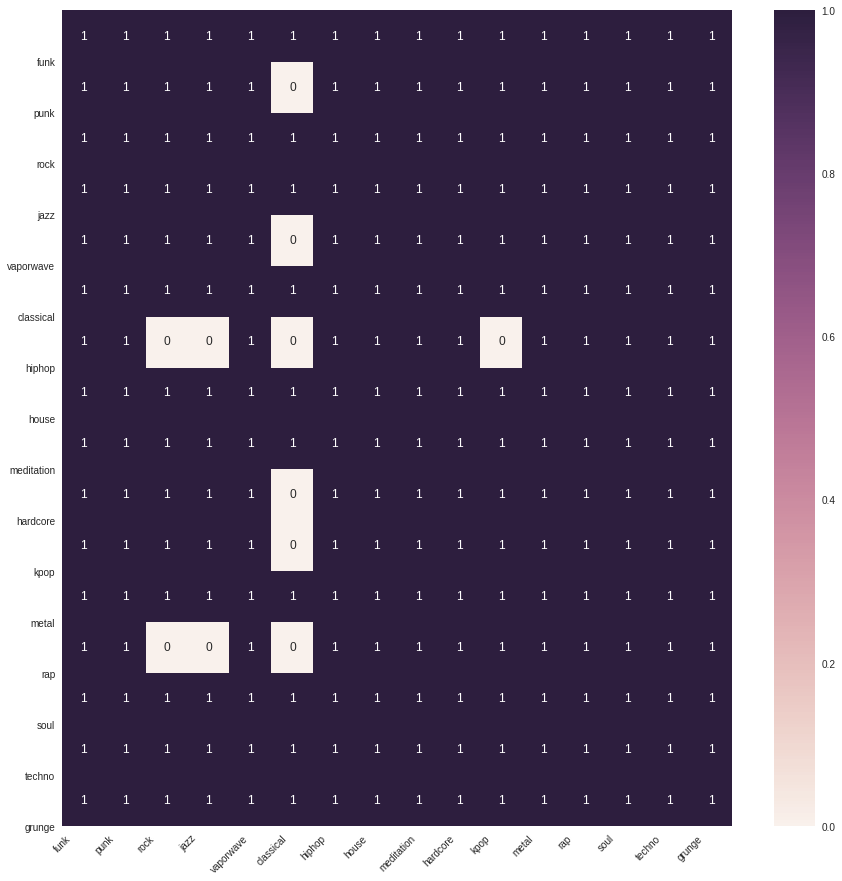

In [471]:
plot_feature_importance('speechiness') #<-- iets uit 'indices' variabele

In [365]:
indices

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [308]:
feature = 'valence'
CIs = {}
means = {}
for i in range(len(all_genres)):
    feature_of_genre = all_genres[i][:, indices.index(feature)]
    CIs[genre_names[i]] = (CI_95(all_genres[i][:, indices.index(feature)]))
    means[genre_names[i]] = np.mean(all_genres[i][:, indices.index(feature)])

In [86]:
means

{'classical': 0.29437022000000002,
 'funk': 0.63542140000000003,
 'grunge': 0.40500494000000004,
 'hardcore': 0.35652687,
 'hiphop': 0.70229240000000004,
 'house': 0.71826319999999999,
 'jazz': 0.50682329999999998,
 'kpop': 0.39022423000000001,
 'meditation': 0.28278236000000001,
 'metal': 0.64777870000000004,
 'punk': 0.42479723999999996,
 'rap': 0.6993550999999999,
 'rock': 0.49046863999999996,
 'soul': 0.58293060000000008,
 'techno': 0.72079710000000008,
 'vaporwave': 0.49575079000000005}

In [101]:
CI_mean_test = {name : [] for name in genre_names}

for name1 in genre_names:
    # take mean of one genre
    mean = means[name1]
    
    # for every other genre, compute the CI and see if the mean lies in it
    for name2 in genre_names:
        CImin, CImax = CIs[name2]
        CI_mean_test[name1] += [mean >= CImin and mean <= CImax]

In [102]:
mean_test_CI = {}
for genre in CI_mean_test.keys():
    right = 0
    for CI in CI_mean_test[genre]:
        right += CI
    mean_test_CI[genre] = right

In [103]:
cm = np.array([CI_mean_test[genre] for genre in CI_mean_test.keys()])

Confusion matrix, without normalization


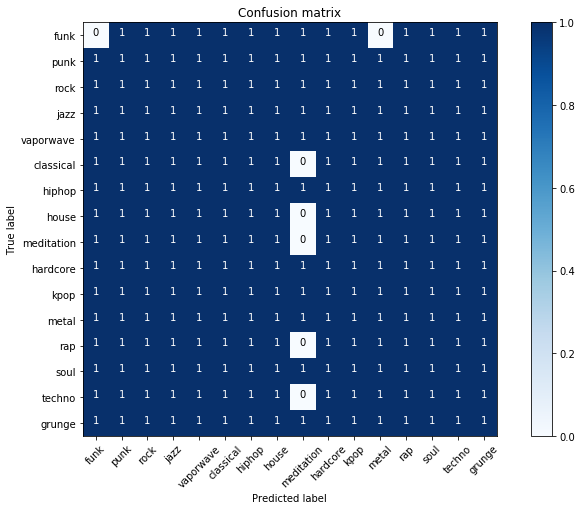

In [104]:
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm, genre_names)
plt.show()

In [11]:
list(CI_mean_test)

{'classical': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'funk': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'grunge': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'hardcore': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'hiphop': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'house': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'jazz': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'kpop': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  T